In [173]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df_pump = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
df_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [175]:
# Load training labels
df_label = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df_label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


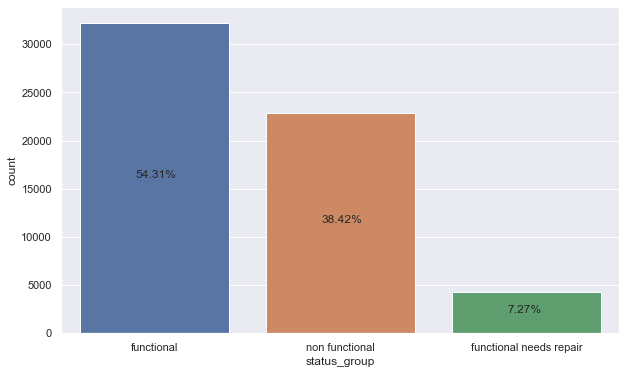

In [176]:
#plot the target variable to view
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df_label['status_group'])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/len(df_label)), (p.get_x()+0.3, p.get_height()*0.5))

In [177]:
# Merge labels with main data for ease in subsequent data clearning & transformation processes
df_pump = df_pump.merge(df_label, how='inner', on='id')
df_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [178]:
df_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [179]:
df_pump.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [180]:
df_pump.isnull().sum()/len(df_pump)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

<Axes: >

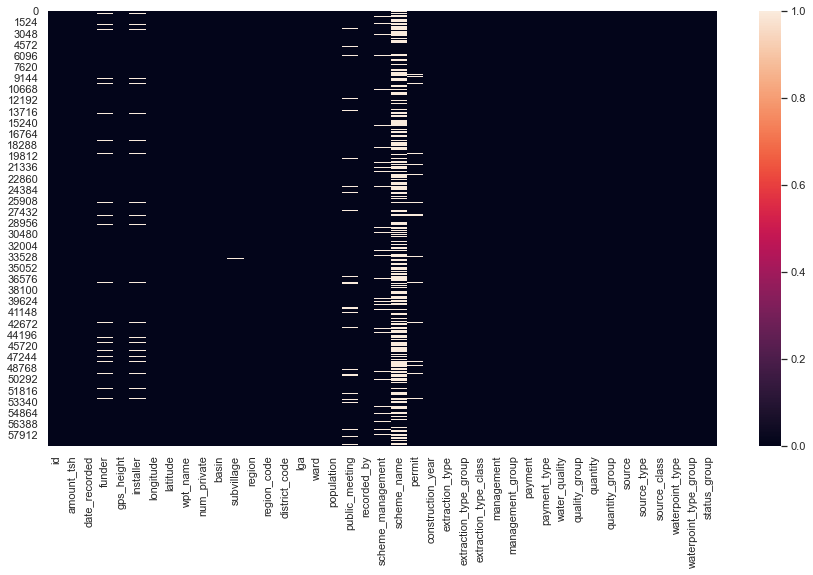

In [181]:
# Get visual sense of null data
plt.subplots(figsize=(15,8))
sns.heatmap(df_pump.isnull())

In [182]:
# Describe all columns to get top frequencies, min/max, means, deviations
df_pump.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400.0,NaN,NaN,NaN,37115.131768,21453.128371,0.0,18519.75,37061.5,55656.5,74247.0
amount_tsh,59400.0,NaN,NaN,NaN,317.650385,2997.574558,0.0,0.0,0.0,20.0,350000.0
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55765,1897,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400.0,NaN,NaN,NaN,34.077427,6.567432,0.0,33.090347,34.908743,37.178387,40.345193
latitude,59400.0,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-0.0
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400.0,NaN,NaN,NaN,0.474141,12.23623,0.0,0.0,0.0,0.0,1776.0


In [183]:
df_pump = df_pump.drop(['amount_tsh','wpt_name','num_private','subvillage','region_code',
                        'lga','ward','recorded_by','scheme_name','extraction_type',
                        'extraction_type_group','management_group','payment_type','water_quality',
                        'quantity_group','source_class','source','waterpoint_type_group','public_meeting'], axis=1) 

In [184]:
df_pump.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,False,1999,gravity,vwc,pay annually,good,enough,spring,communal standpipe,functional
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,...,True,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe multiple,functional
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,True,1986,submersible,vwc,never pay,good,dry,borehole,communal standpipe multiple,non functional
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


In [185]:
df_pump['region'].nunique()

21

In [186]:
df_pump.isnull().sum()

id                          0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
district_code               0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment                     0
quality_group               0
quantity                    0
source_type                 0
waterpoint_type             0
status_group                0
dtype: int64

In [187]:
df_pump['permit'] = df_pump.groupby('region')['permit'].transform(lambda x: x.fillna(x.mode()[0]))

In [188]:
df_pump['permit'].isnull().sum()

0

In [189]:
df_pump.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,False,1999,gravity,vwc,pay annually,good,enough,spring,communal standpipe,functional
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,...,True,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe multiple,functional
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,True,1986,submersible,vwc,never pay,good,dry,borehole,communal standpipe multiple,non functional
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


In [190]:
#from sklearn import preprocessing

#encoder = preprocessing.LabelEncoder()
#categorical_features = ['funder','installer','basin',  'scheme_management', 'permit', 
                       # 'extraction_type_class', 'management', 'payment', 'quality_group', 'quantity', 
                        #'source_type', 'waterpoint_type', 'population', 'status_group']

# Copy status group labels
#df_pump['status_group_labels'] = df_pump['status_group']

# Encode values
#df_pump[categorical_features] = df_pump[categorical_features].apply(encoder.fit_transform)

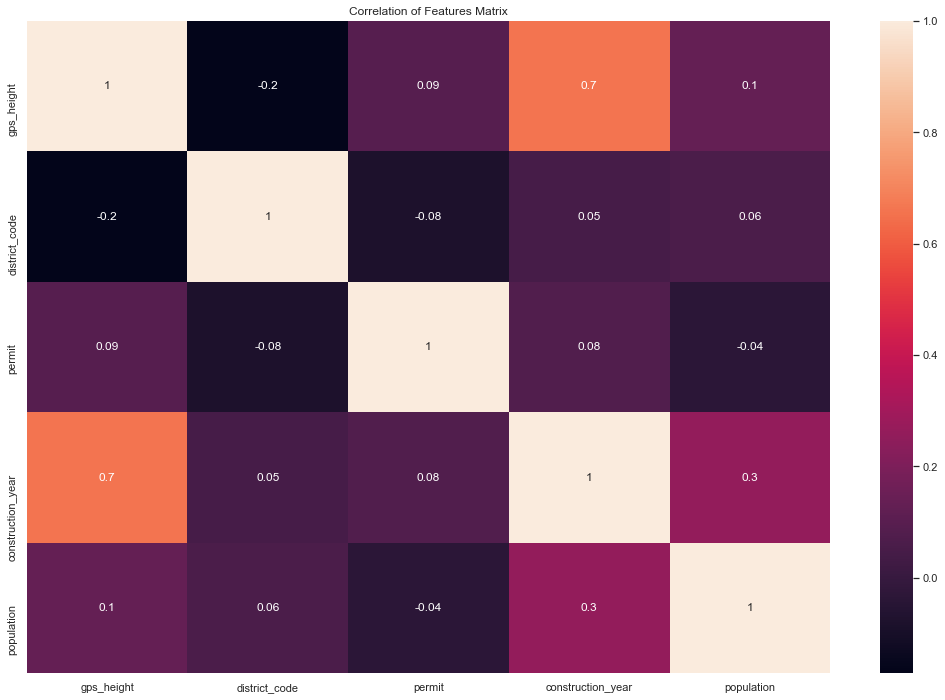

In [191]:
# Visualize Correlation with features Matrix 
corrMatrix = df_pump[['funder', 'gps_height', 'installer', 'basin', 'region', 'district_code', 
            'scheme_management', 'permit', 'extraction_type_class', 'management', 'payment', 'quality_group', 'quantity', 'source_type',
            'waterpoint_type', 'construction_year',  'population', 'status_group']].corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()

In [192]:
# --- Funder ---
df_pump.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
dtype: int64

In [193]:
# Let's impute them as other for now
df_pump.funder.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
df_pump.loc[df_pump.funder.str.len() == 1, 'funder'] = 'other'

In [194]:
df_pump.isnull().sum()

id                          0
date_recorded               0
funder                      0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
district_code               0
population                  0
scheme_management        3877
permit                      0
construction_year           0
extraction_type_class       0
management                  0
payment                     0
quality_group               0
quantity                    0
source_type                 0
waterpoint_type             0
status_group                0
dtype: int64

In [195]:
# Let's impute them as unknown for now
df_pump.installer.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
df_pump.loc[df_pump.installer.str.len() == 1, 'installer'] = 'other'

df_pump.installer.isnull().sum()

0

In [196]:
# Let's impute them as unknown for now
df_pump.scheme_management.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
df_pump.loc[df_pump.scheme_management.str.len() == 1, 'scheme_management'] = 'other'

df_pump.scheme_management.isnull().sum()

0

In [197]:
# Current counts of funder & installer
[df_pump['funder'].nunique(), df_pump['installer'].nunique()]

[1884, 2129]

In [198]:
df_fgb = df_pump.groupby(['funder'], as_index=False).count()[['funder', 'id']]
df_fgb

,funder,id
0,A/co Germany,15
1,Aar,33
2,Abas Ka,1
3,Abasia,43
4,Abc-ihushi Development Cent,1
...,...,...
1879,Zao Water Spring,3
1880,Zao Water Spring X,1
1881,Zinduka,1
1882,Zingibali Secondary,1


In [199]:
other_funders = df_fgb[df_fgb.id<5].funder.unique()
df_pump['funder'] = df_pump['funder'].apply(lambda x : x if (x not in other_funders)  else 'Other')

In [200]:
# Installers with less than 5 pumps, will be renamed to Other
df_igb = df_pump.groupby(['installer'], as_index=False).count()[['installer', 'id']]
other_installers = df_igb[df_igb.id<5].installer.unique()
df_pump['installer'] = df_pump['installer'].apply(lambda x : x if (x not in other_installers)  else 'Other')

In [201]:
# Cleanup
del df_fgb
del df_igb

# View reduced counts
[df_pump['funder'].nunique(), df_pump['installer'].nunique()]

[569, 616]

In [202]:
df_pump['date_recorded'].max()


'2013-12-03'

In [203]:
df_pump['construction_year'].max()


2013

In [204]:
# We have date fields as date_recorded and construction_year, will consider the later one
df_pump['construction_year'].unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965],
      dtype=int64)

In [205]:
df_pump['age'] = df_pump['construction_year'].apply(lambda x: (2013 - x) if x != 0 else 0 )

# review relation with recorded date
df_pump[['age', 'construction_year', 'date_recorded']].drop_duplicates()

,age,construction_year,date_recorded
0,14,1999,2011-03-14
1,3,2010,2013-03-06
2,4,2009,2013-02-25
3,27,1986,2013-01-28
4,0,0,2011-07-13
...,...,...,...
59280,26,1987,2013-03-13
59300,7,2006,2013-12-01
59366,13,2000,2013-02-02
59386,4,2009,2011-08-22


In [206]:
df_pump.age.describe()

count    59400.000000
mean        10.542525
std         12.681096
min          0.000000
25%          0.000000
50%          5.000000
75%         17.000000
max         53.000000
Name: age, dtype: float64

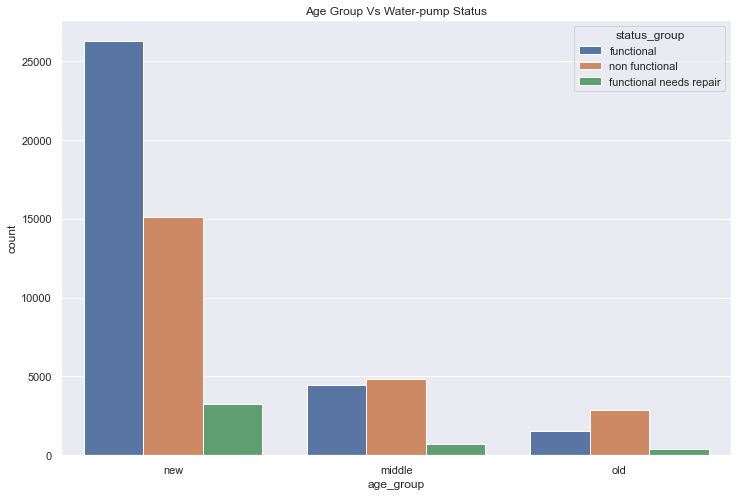

In [207]:
# There are many age values, will group them for better analysis
def get_age_group(x):
    if x <= 17:
        return 'new'
    elif x > 17 and x <=34:
        return 'middle'
    else:
        return 'old'

# Create new feature age_group
df_pump['age_group'] = df_pump['age'].apply(get_age_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=df_pump['age_group'], hue=df_pump['status_group'])
plt.title('Age Group Vs Water-pump Status')
plt.show()

In [208]:
df_pump.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

<Axes: xlabel='population'>

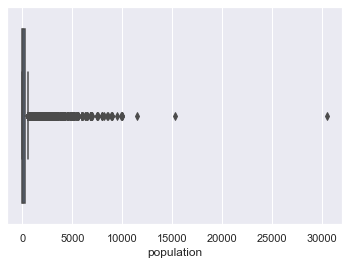

In [209]:
sns.boxplot(x=df_pump.population)

In [210]:
print('Outlier for population =', df_pump[df_pump.population > 10000].population.tolist() )

Outlier for population = [15300, 30500, 11463]


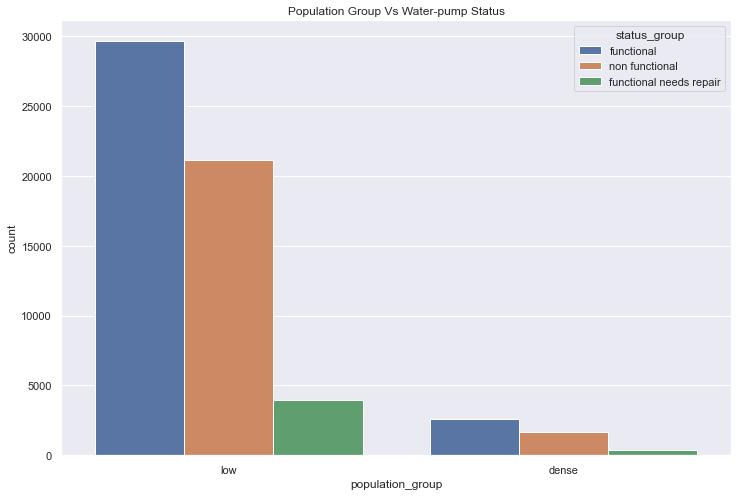

In [211]:
# Create Population Group to better assess the sparse data
def get_population_group(x):
    if x <= 500:
        return 'low'
    else:
        return 'dense'
    
df_pump['population_group'] = df_pump['population'].apply(get_population_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=df_pump['population_group'], hue=df_pump['status_group'])
plt.title('Population Group Vs Water-pump Status')
plt.show()

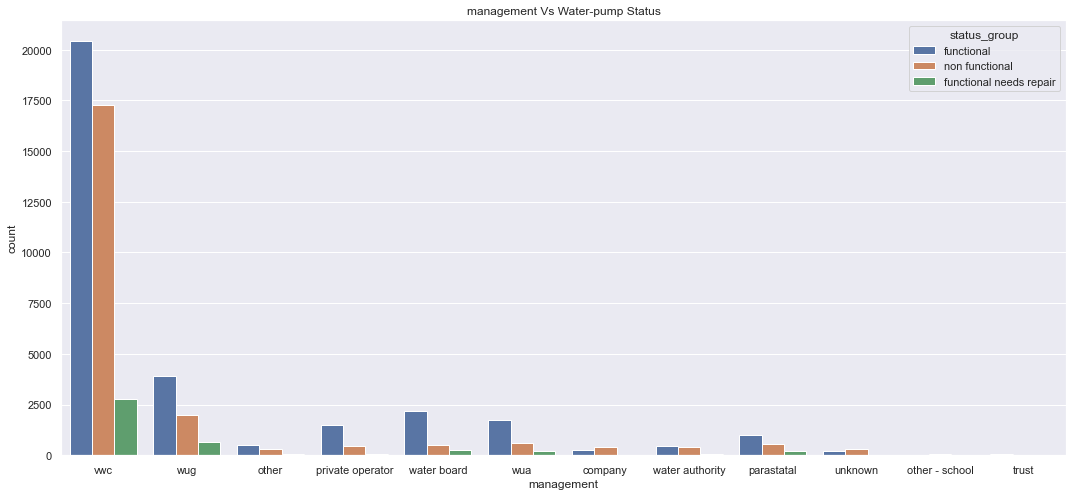

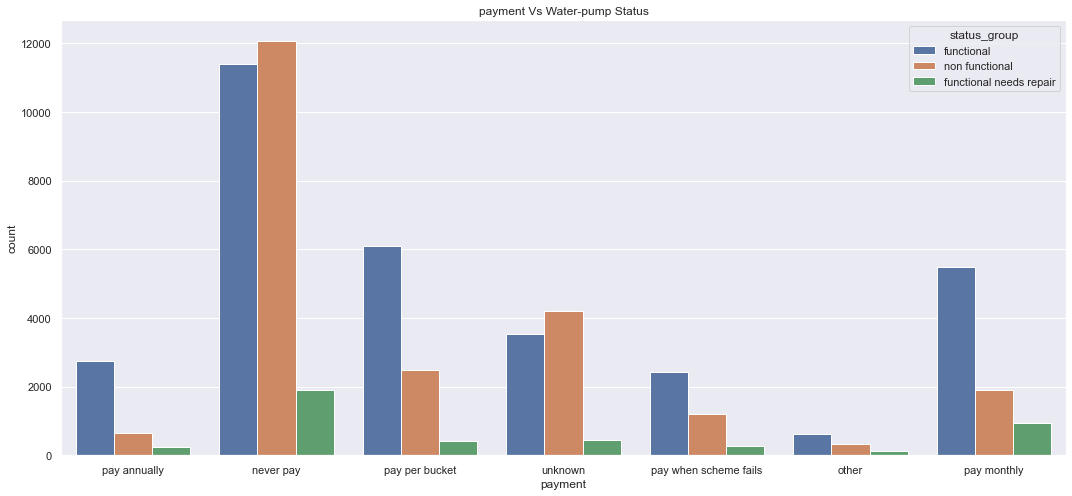

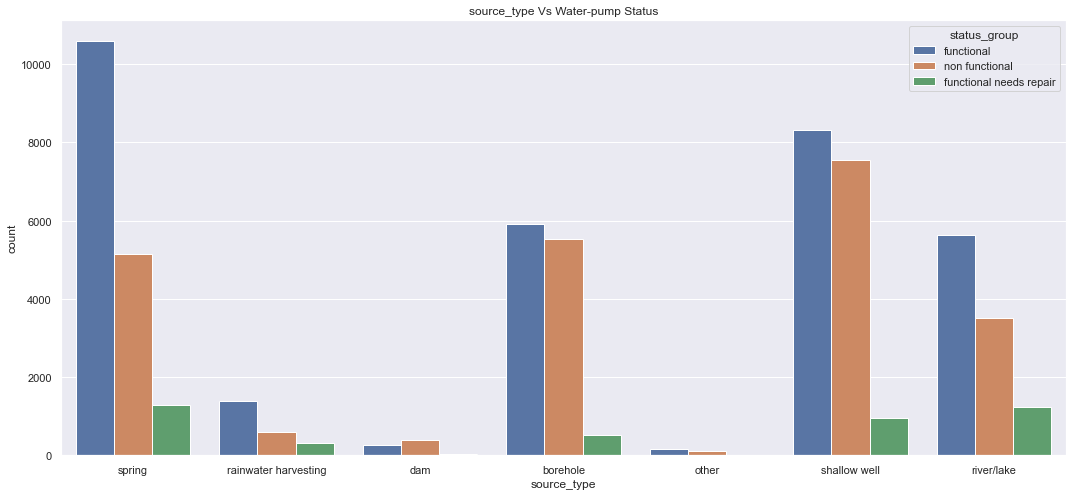

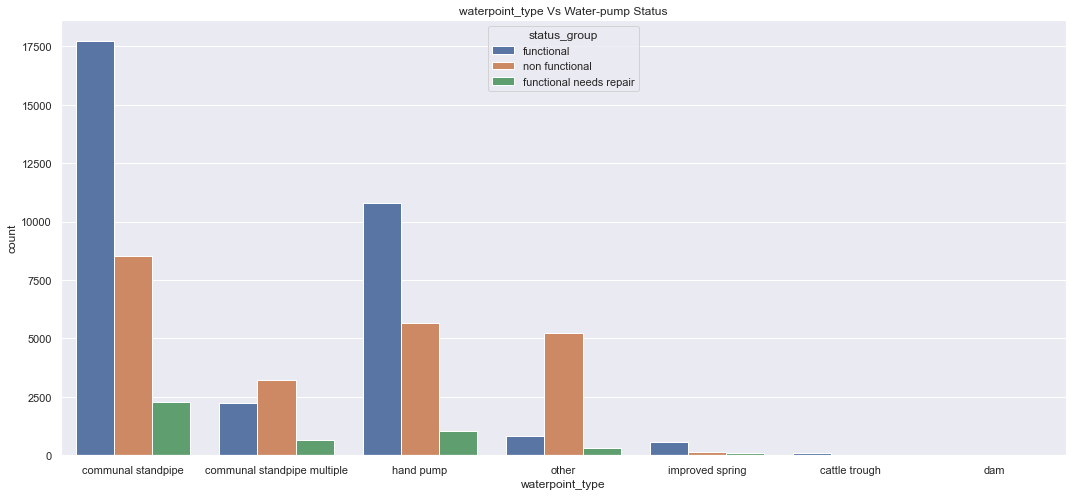

In [212]:
def plot_counts(featureX):
    plt.subplots(figsize=(18,8))
    sns.set(font_scale=1)
    sns.countplot(x=df_pump[featureX], hue=df_pump['status_group'])
    plt.title(f'{featureX} Vs Water-pump Status')
    plt.show()
    return

# Management of Waterpoint
plot_counts('management')

# Payment Type of Waterpoint
plot_counts('payment')

# Water source of Waterpoint
plot_counts('source_type')

# Water source of Waterpoint
plot_counts('waterpoint_type')

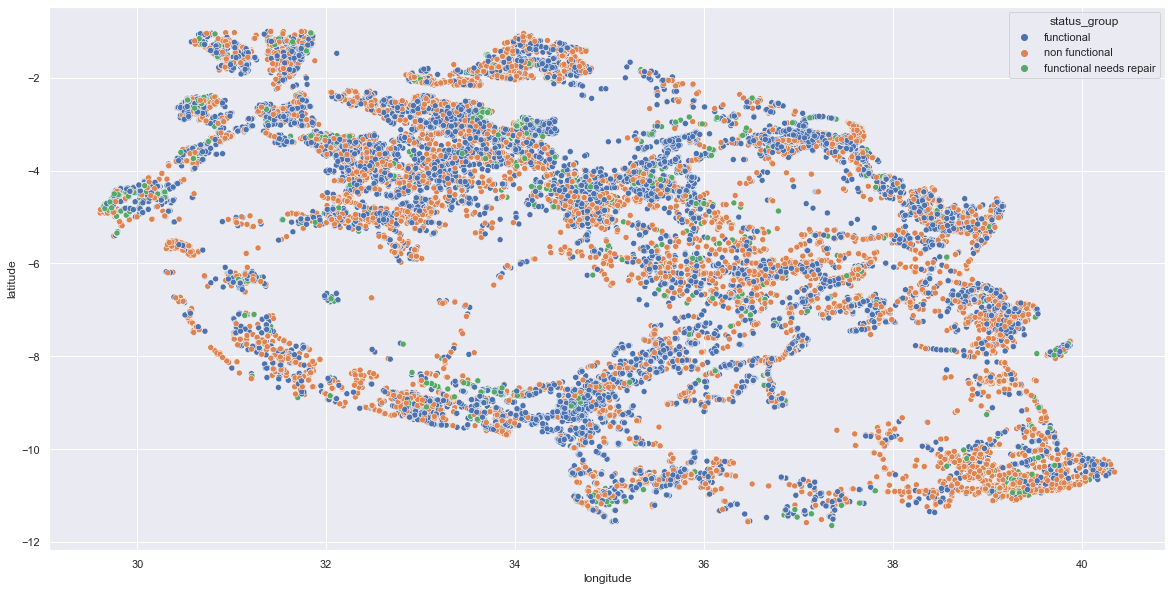

In [213]:
fig, ax  = plt.subplots(figsize=(20,10))
loc_data = df_pump.loc[(df_pump.longitude>0) & (df_pump.latitude<0)]
sns.scatterplot(data=loc_data, x="longitude", y="latitude", hue="status_group", ax=ax);

In [215]:
df_pump = df_pump.drop(['longitude', 'latitude'], axis=1)

In [216]:
df_pump.isnull().sum()

id                       0
date_recorded            0
funder                   0
gps_height               0
installer                0
basin                    0
region                   0
district_code            0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment                  0
quality_group            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
age                      0
age_group                0
population_group         0
dtype: int64

In [217]:

df_pump['basin_region'] = df_pump['basin'] + '_' + df_pump['region']

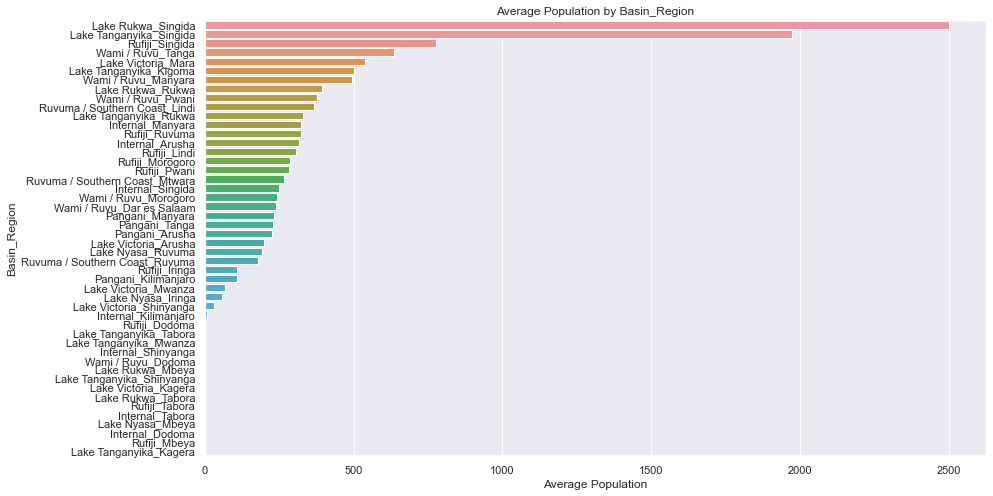

In [218]:
# Calculate the average population for each basin_region
avg_population = df_pump.groupby('basin_region')['population'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(y='basin_region', x='population', data=avg_population, order=avg_population.sort_values('population', ascending=False)['basin_region'])
plt.title('Average Population by Basin_Region')
plt.xlabel('Average Population')
plt.ylabel('Basin_Region')

# Display the plot
plt.show()

In [219]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
categorical_features = ['funder',  'installer', 'basin_region', 'district_code', 
            'scheme_management',  'extraction_type_class', 'management', 'payment', 'quality_group', 'quantity', 'source_type',
            'waterpoint_type',  'age_group', 'population_group', 'status_group']

 

# Copy status group labels
df_pump['status_group_labels'] = df_pump['status_group']
# Drop the remaining useless columns
df_pump = df_pump.drop(['id'], axis=1)
# Encode values
df_pump[categorical_features] = df_pump[categorical_features].apply(encoder.fit_transform)

In [220]:
binary_enc = preprocessing.OrdinalEncoder()
permit_encoded = binary_enc.fit_transform(df_pump[['permit']])

permit_encoded = permit_encoded.flatten()


df_pump['permit_encoded'] = permit_encoded

df_pump['permit_encoded']


0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59395    1.0
59396    1.0
59397    0.0
59398    1.0
59399    1.0
Name: permit_encoded, Length: 59400, dtype: float64

In [221]:
df_pump.head()

,date_recorded,funder,gps_height,installer,basin,region,district_code,population,scheme_management,permit,...,quantity,source_type,waterpoint_type,status_group,age,age_group,population_group,basin_region,status_group_labels,permit_encoded
0,2011-03-14,407,1390,441,Lake Nyasa,Iringa,5,109,7,False,...,1,6,1,0,14,1,1,7,functional,0.0
1,2013-03-06,161,1399,170,Lake Victoria,Mara,2,280,2,True,...,2,3,1,0,3,1,1,23,functional,1.0
2,2013-02-25,273,686,602,Pangani,Manyara,4,250,7,True,...,1,1,2,0,4,1,1,28,functional,1.0
3,2013-01-28,518,263,535,Ruvuma / Southern Coast,Mtwara,17,58,7,True,...,0,0,2,2,27,0,1,40,non functional,1.0
4,2011-07-13,357,0,33,Lake Victoria,Kagera,1,0,12,True,...,3,3,1,0,0,1,1,22,functional,1.0


In [222]:
df_pump.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,59400.0,NaN,NaN,NaN,290.397811,174.113951,0.0,157.0,248.0,446.0,568.0
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,59400.0,NaN,NaN,NaN,258.899411,183.735729,0.0,125.0,169.0,403.0,615.0
basin,59400,9,Lake Victoria,10248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,59400,21,Iringa,5294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district_code,59400.0,NaN,NaN,NaN,3.867424,2.992263,0.0,2.0,3.0,5.0,19.0
population,59400.0,NaN,NaN,NaN,179.909983,471.482176,0.0,0.0,25.0,215.0,30500.0
scheme_management,59400.0,NaN,NaN,NaN,7.54037,2.196393,0.0,7.0,7.0,9.0,12.0
permit,59400,2,True,41880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


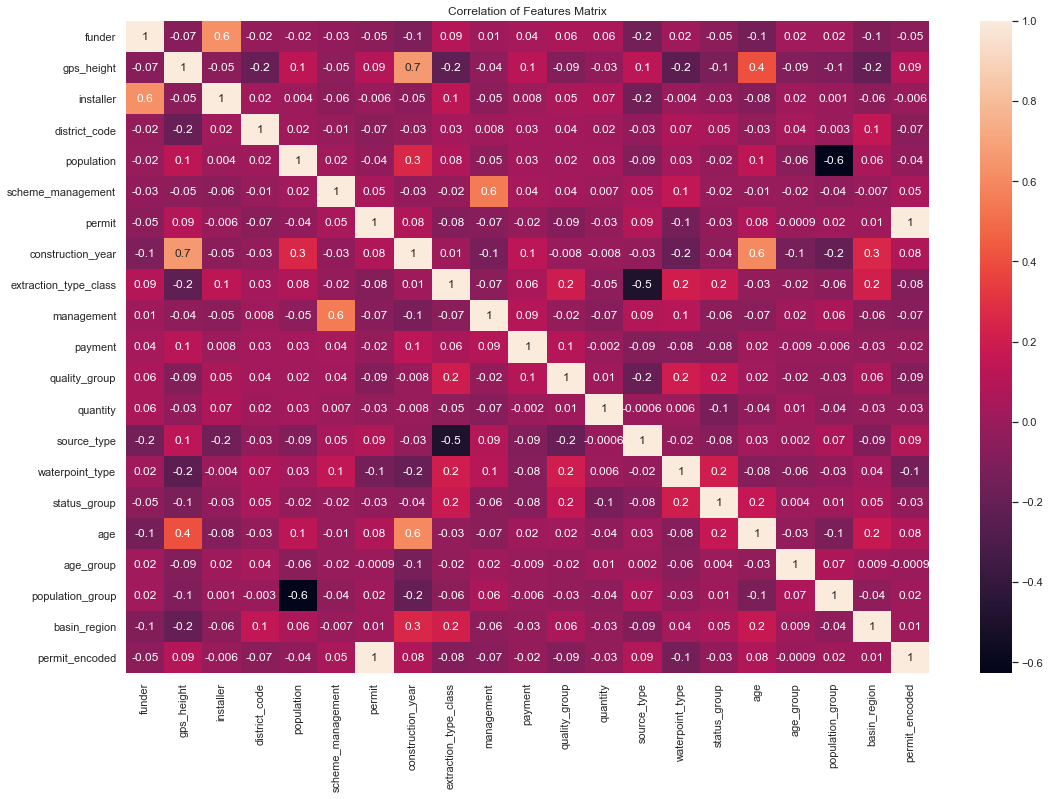

In [223]:
corrMatrix = df_pump.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()

In [224]:
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a contingency table
contingency_table = pd.crosstab(df_pump['scheme_management'], df_pump['management'])

# Compute Cramér's V
cramers_v_score = cramers_v(contingency_table.values)

# Create a new feature based on Cramér's V
df_pump['scheme_management_management_association'] = cramers_v_score
df_pump.head()

,date_recorded,funder,gps_height,installer,basin,region,district_code,population,scheme_management,permit,...,source_type,waterpoint_type,status_group,age,age_group,population_group,basin_region,status_group_labels,permit_encoded,scheme_management_management_association
0,2011-03-14,407,1390,441,Lake Nyasa,Iringa,5,109,7,False,...,6,1,0,14,1,1,7,functional,0.0,0.749155
1,2013-03-06,161,1399,170,Lake Victoria,Mara,2,280,2,True,...,3,1,0,3,1,1,23,functional,1.0,0.749155
2,2013-02-25,273,686,602,Pangani,Manyara,4,250,7,True,...,1,2,0,4,1,1,28,functional,1.0,0.749155
3,2013-01-28,518,263,535,Ruvuma / Southern Coast,Mtwara,17,58,7,True,...,0,2,2,27,0,1,40,non functional,1.0,0.749155
4,2011-07-13,357,0,33,Lake Victoria,Kagera,1,0,12,True,...,3,1,0,0,1,1,22,functional,1.0,0.749155


In [225]:
features=['funder',  'installer', 'basin_region', 'district_code', 
            'permit', 'extraction_type_class', 'scheme_management_management_association', 'payment', 'quality_group', 'quantity', 'source_type',
            'waterpoint_type','permit_encoded',  'age_group', 'population_group']
target = ['status_group']
df_pump_X = df_pump[features]
df_pump_Y = df_pump[target]

df_pump_X.head()


,funder,installer,basin_region,district_code,permit,extraction_type_class,scheme_management_management_association,payment,quality_group,quantity,source_type,waterpoint_type,permit_encoded,age_group,population_group
0,407,441,7,5,False,0,0.749155,2,2,1,6,1,0.0,1,1
1,161,170,23,2,True,0,0.749155,0,2,2,3,1,1.0,1,1
2,273,602,28,4,True,0,0.749155,4,2,1,1,2,1.0,1,1
3,518,535,40,17,True,5,0.749155,0,2,0,0,2,1.0,0,1
4,357,33,22,1,True,0,0.749155,0,2,3,3,1,1.0,1,1


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [227]:
X_train, X_test, y_train, y_test = train_test_split(df_pump_X, df_pump_Y, 
                                                    random_state=1, stratify= df_pump_Y, 
                                                    test_size = 0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(39798, 15) (39798, 1)
(19602, 15) (19602, 1)


In [228]:
df_pump_X

,funder,installer,basin_region,district_code,permit,extraction_type_class,scheme_management_management_association,payment,quality_group,quantity,source_type,waterpoint_type,permit_encoded,age_group,population_group
0,407,441,7,5,False,0,0.749155,2,2,1,6,1,0.0,1,1
1,161,170,23,2,True,0,0.749155,0,2,2,3,1,1.0,1,1
2,273,602,28,4,True,0,0.749155,4,2,1,1,2,1.0,1,1
3,518,535,40,17,True,5,0.749155,0,2,0,0,2,1.0,0,1
4,357,33,22,1,True,0,0.749155,0,2,3,3,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,153,53,27,5,True,0,0.749155,4,2,1,6,1,1.0,1,1
59396,62,73,31,4,True,0,0.749155,2,2,1,4,1,1.0,1,1
59397,568,609,33,7,False,1,0.749155,3,1,1,0,4,0.0,1,1
59398,357,359,30,4,True,1,0.749155,0,2,2,5,4,1.0,1,1


In [229]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [230]:
y_predicted = rf_classifier.predict(X_test)

In [231]:
confusion_matrix(y_test, y_predicted)

array([[9282,  293, 1070],
       [ 737,  420,  268],
       [1765,  159, 5608]], dtype=int64)

In [232]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     10645
           1       0.48      0.29      0.37      1425
           2       0.81      0.74      0.77      7532

    accuracy                           0.78     19602
   macro avg       0.69      0.64      0.66     19602
weighted avg       0.77      0.78      0.77     19602



In [233]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [301,401,501],
    'max_depth' : [11,21,31],    
    'max_features' : ['sqrt','log2']
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [11, 21, 31],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [301, 401, 501]})

In [234]:
cv.best_params_

{'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 401}

In [261]:
# Predict again with the values of best parameters
rf_classifier_bst = RandomForestClassifier(n_estimators=401, n_jobs=-1,max_depth=21, max_features='sqrt', bootstrap=True, criterion='gini')
rf_classifier_bst.fit(X_train, y_train.values.ravel())
y_predict_bst = rf_classifier_bst.predict(X_test)

In [262]:
# Confusion Matrix -> Review where model made mistakes 
# Like False positives, False Negatives etc.

cnf_matrix = confusion_matrix(y_test, y_predict_bst)
cnf_matrix

array([[9496,  221,  928],
       [ 802,  382,  241],
       [1889,  128, 5515]], dtype=int64)

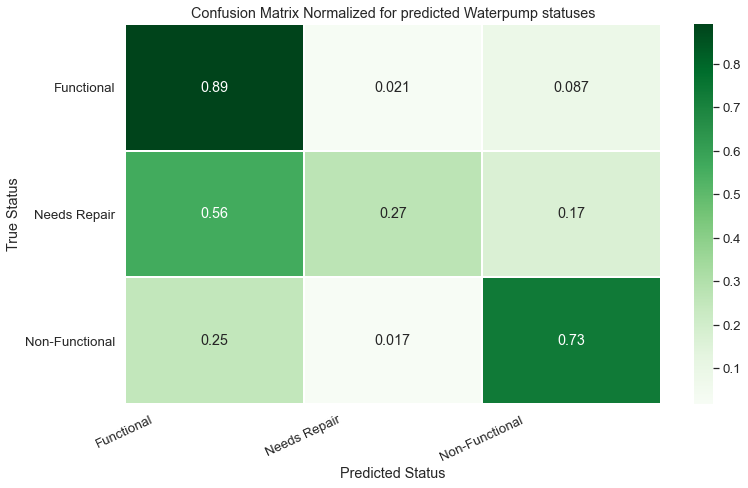

In [263]:
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses')
plt.show()

In [264]:
print(classification_report(y_test, y_predict_bst, target_names=class_names))

                precision    recall  f1-score   support

    Functional       0.78      0.89      0.83     10645
  Needs Repair       0.52      0.27      0.35      1425
Non-Functional       0.83      0.73      0.78      7532

      accuracy                           0.79     19602
     macro avg       0.71      0.63      0.65     19602
  weighted avg       0.78      0.79      0.78     19602



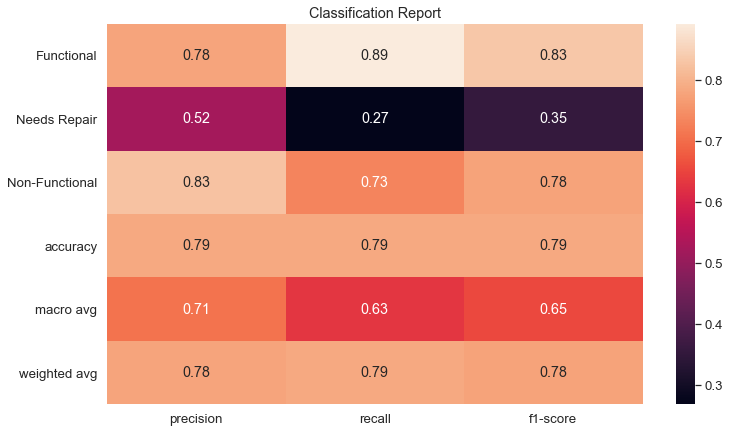

In [265]:
# Formatting Classification Report
clf_rpt = classification_report(y_test, y_predict_bst, target_names=class_names, output_dict=True)

# .iloc[:-1, :] to exclude support
plt.figure(figsize=(12,7))
sns.heatmap(pd.DataFrame(clf_rpt).iloc[:-1, :].T, annot=True)
plt.title ('Classification Report')
plt.show()

In [266]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)



# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Get classification report for detailed performance metrics
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.78
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     10645
           1       0.61      0.23      0.34      1425
           2       0.83      0.71      0.77      7532

    accuracy                           0.78     19602
   macro avg       0.74      0.62      0.64     19602
weighted avg       0.78      0.78      0.77     19602



In [267]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
# given prameters different values
random_grid={'max_depth':list(range(1,30,2)),'criterion':['gini','entropy']}
# our decision tree model 
dtc=DecisionTreeClassifier(random_state=46)
# fit grid search  
GS=GridSearchCV(dtc,random_grid,cv=10)
GS.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=46),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29]})

In [268]:
# obtian the best criterion= 'gini' and max_depth =29 
GS.best_params_

{'criterion': 'gini', 'max_depth': 17}

In [269]:
# obtian the best score 
GS.best_score_

0.7658678918593975

In [270]:
# using the best parameters that I obtianed from grid search and using same random_state
dtc_final=DecisionTreeClassifier(max_depth= 17,
                               criterion='gini',
                              random_state=46)

In [271]:
dtc_final.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17, random_state=46)

In [272]:
print('Accuracy score of train data :{}'.format(dtc_final.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(dtc_final.score(X_test,y_test)))

Accuracy score of train data :0.8417005879692447
Accuracy score of test data:0.7693602693602694


In [274]:
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
# obtian train data f1_Score
dt_pre_train=dtc_final.predict(X_train)
print('Train data f1_Score:{}'.format(f1_score(y_train,dt_pre_train,average='macro')))
# Obtain Test data f1_Score
dt_smote_pred=dtc_final.predict(X_test)
print('Test data f1_Score:{}'.format(f1_score(y_test, dt_smote_pred,average='macro')))

Train data f1_Score:0.7490592926939508
Test data f1_Score:0.6429157172962096
